# 1.1 Import libraries 


In [35]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,precision_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
import itertools

# 2.1 Loading the Dataset


In [36]:
row_df=pd.read_csv("application_data.csv")
row_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [37]:
row_df.shape

(307511, 122)

# 3.1 Understanding the Data

In [38]:
row_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

# 4.1 Spliting the data

In [39]:
x=row_df.drop(columns=['TARGET'])
y=row_df['TARGET']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)


# 5.1 Cleaning the data

### 5.2 No correlation with EXT_SOURCE_X (Normalized score from external data source)

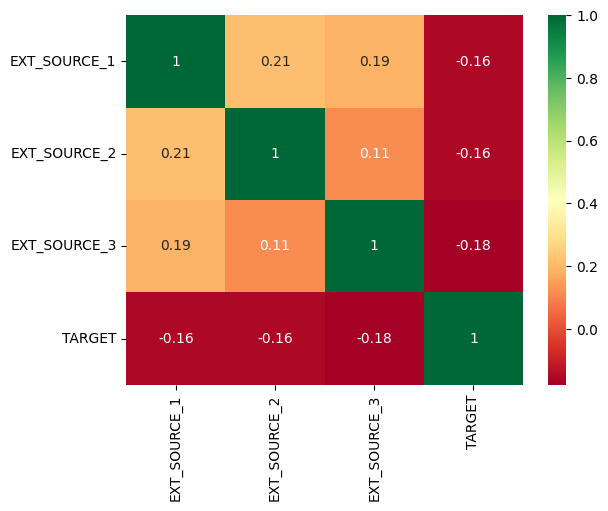

In [40]:
# Checking correlation of EXT_SOURCE_X columns vs TARGET column
EXT_SOURCE_X=["EXT_SOURCE_1", "EXT_SOURCE_2", "EXT_SOURCE_3"]
Source = pd.concat([x_train[EXT_SOURCE_X], y_train], axis=1)
source_corr = Source.corr()
ax = sns.heatmap(source_corr,
            xticklabels=source_corr.columns,
            yticklabels=source_corr.columns,
            annot = True,
            cmap ="RdYlGn")

### 5.3 Unnecessary Flag Document

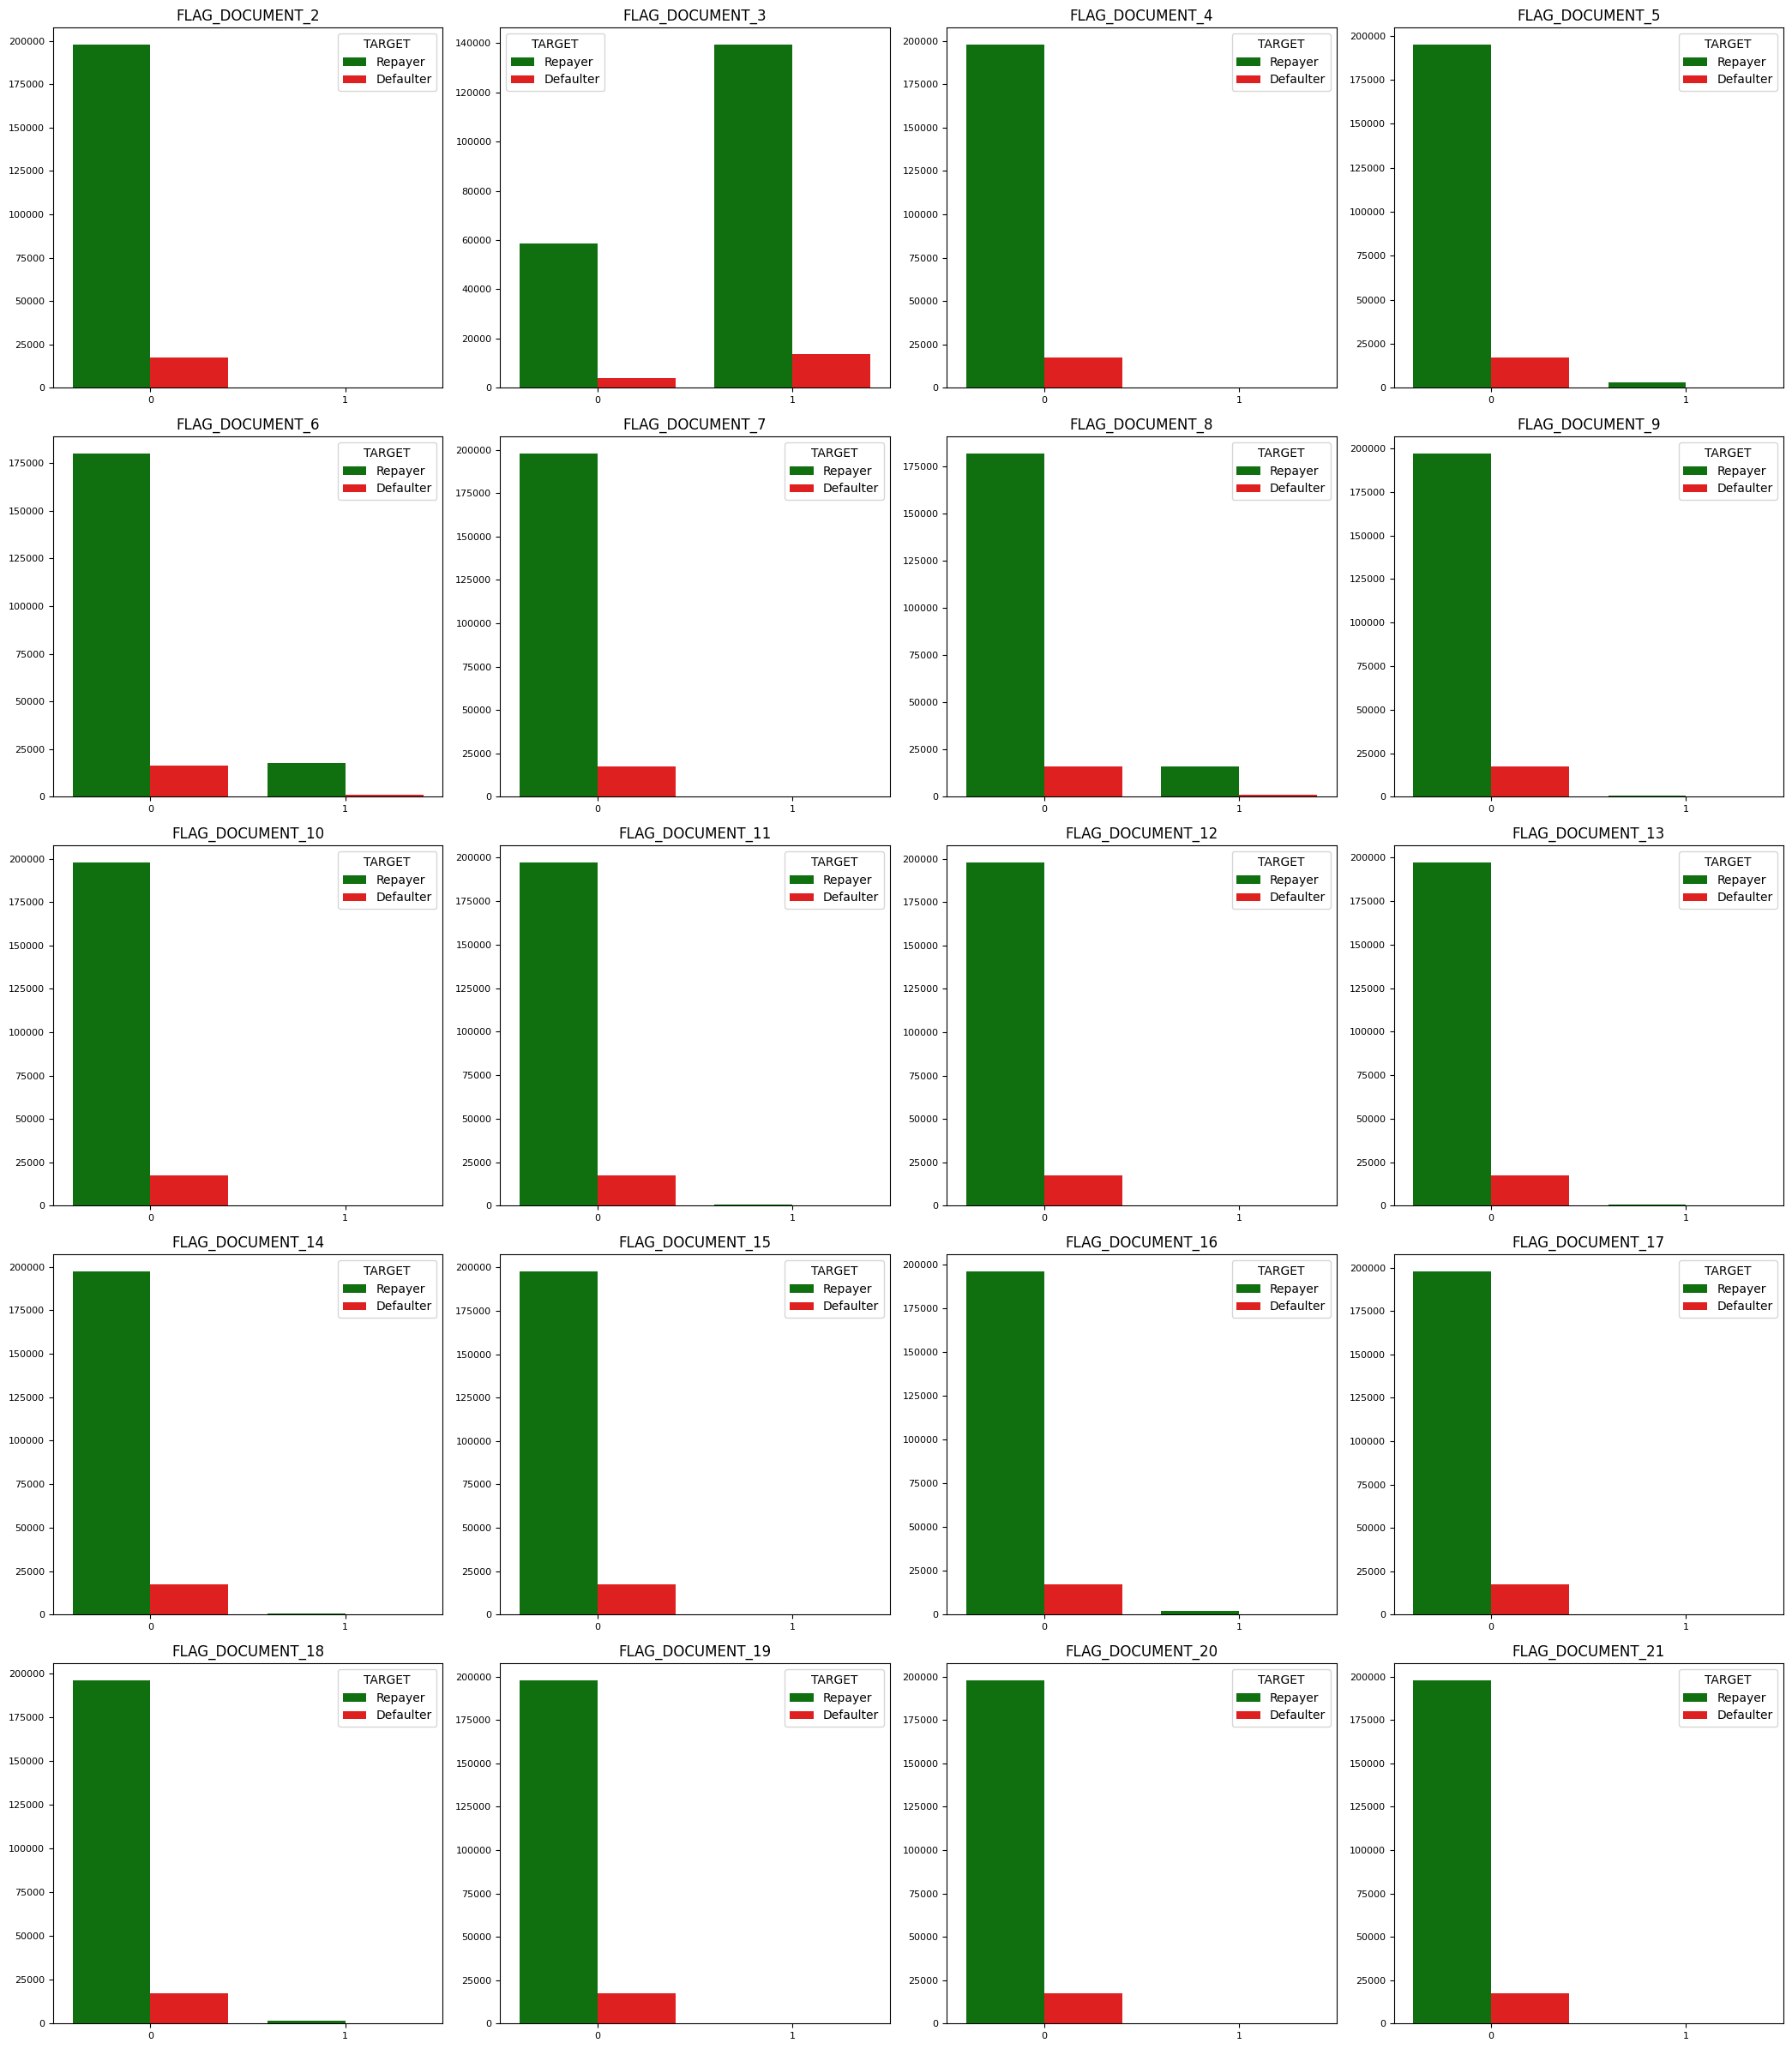

In [41]:
# Checking the relevance of Flag_Document and whether it has any relation with loan repayment status
col_Doc = ['FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
           'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11',
           'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16',
           'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']

df_flag = pd.concat([x_train[col_Doc], y_train], axis=1)

length = len(col_Doc)

df_flag["TARGET"] = df_flag["TARGET"].replace({1: "Defaulter", 0: "Repayer"})

fig = plt.figure(figsize=(21, 24))

for i, j in itertools.zip_longest(col_Doc, range(length)):
    plt.subplot(5, 4, j + 1)
    ax = sns.countplot(x=i, hue="TARGET", data=df_flag, palette=["g", "r"])
    plt.xticks(fontsize=8)  # Adjust x-axis label font size
    plt.yticks(fontsize=8)  # Adjust y-axis label font size
    plt.xlabel("")  
    plt.ylabel("")  
    plt.title(i)

plt.tight_layout()  
plt.show()

In [42]:
#droping the unwanted features
col_Doc = [col for col in col_Doc if col != 'FLAG_DOCUMENT_3']
x_train = x_train.drop(columns=col_Doc+EXT_SOURCE_X)
x_test = x_test.drop(columns=col_Doc+EXT_SOURCE_X)
x_train.shape

(215257, 99)

### 5.4 Checking missing values

In [43]:
# Calculate the percentage of missing values for each column
missing_percent = x_train.isnull().sum() / len(x_train) * 100
missing_percent = missing_percent[missing_percent > 0]
missing_percent.sort_values(ascending=False, inplace=True)

plot_df = pd.DataFrame({
    'Column': missing_percent.index,
    'Missing Percentage': missing_percent.values
})

fig = px.bar(plot_df, x='Column', y='Missing Percentage', title='Percentage of Missing Values by Column')
fig.update_xaxes(categoryorder='total descending')  # Sort x-axis categories by missing percentage

fig.update_layout(
    xaxis_type='category',
    xaxis=dict(tickmode='array', tickvals=plot_df['Column'], ticktext=plot_df['Column']),
    autosize=True,
    width=1200,
    height=600,
)

# Show the interactive plot
fig.show()

In [44]:
#droping fetures have more then 50% missing values
missing_percent = x_train.isnull().mean() * 100
threshold = 50
columns_to_drop = missing_percent[missing_percent > threshold].index
columns_to_drop

Index(['OWN_CAR_AGE', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BUILD_AVG',
       'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMIN_AVG',
       'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG',
       'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE',
       'BASEMENTAREA_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE',
       'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE',
       'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE',
       'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI',
       'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI',
       'ENTRANCES_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI',
       'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI',
       'NONLIVINGAREA_MEDI', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE',
       'WALLSMATERIAL_MODE'],
      dtype='object')

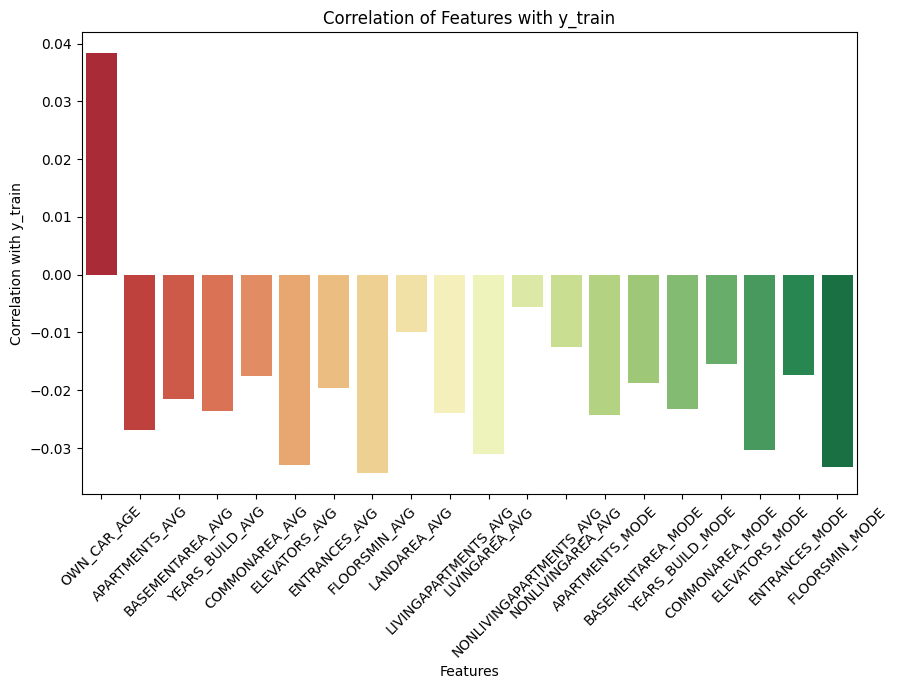

In [45]:
correlations = []

for column in columns_to_drop[:20]:
    correlation = x_train[column].corr(y_train)
    correlations.append(correlation)

# Create a DataFrame for the correlations
correlation_df = pd.DataFrame({'Feature': columns_to_drop[:20], 'Correlation with y_train': correlations})

# Create a bar plot to visualize the correlations
plt.figure(figsize=(10, 6))
sns.barplot(data=correlation_df, x='Feature', y='Correlation with y_train', palette='RdYlGn')
plt.xticks(rotation=45)
plt.xlabel('Features')
plt.ylabel('Correlation with y_train')
plt.title('Correlation of Features with y_train')
plt.show()

In [46]:
x_train = x_train.drop(columns=columns_to_drop)
x_test = x_test.drop(columns=columns_to_drop)
x_train.shape

(215257, 59)

### 5.5 Unlogical values

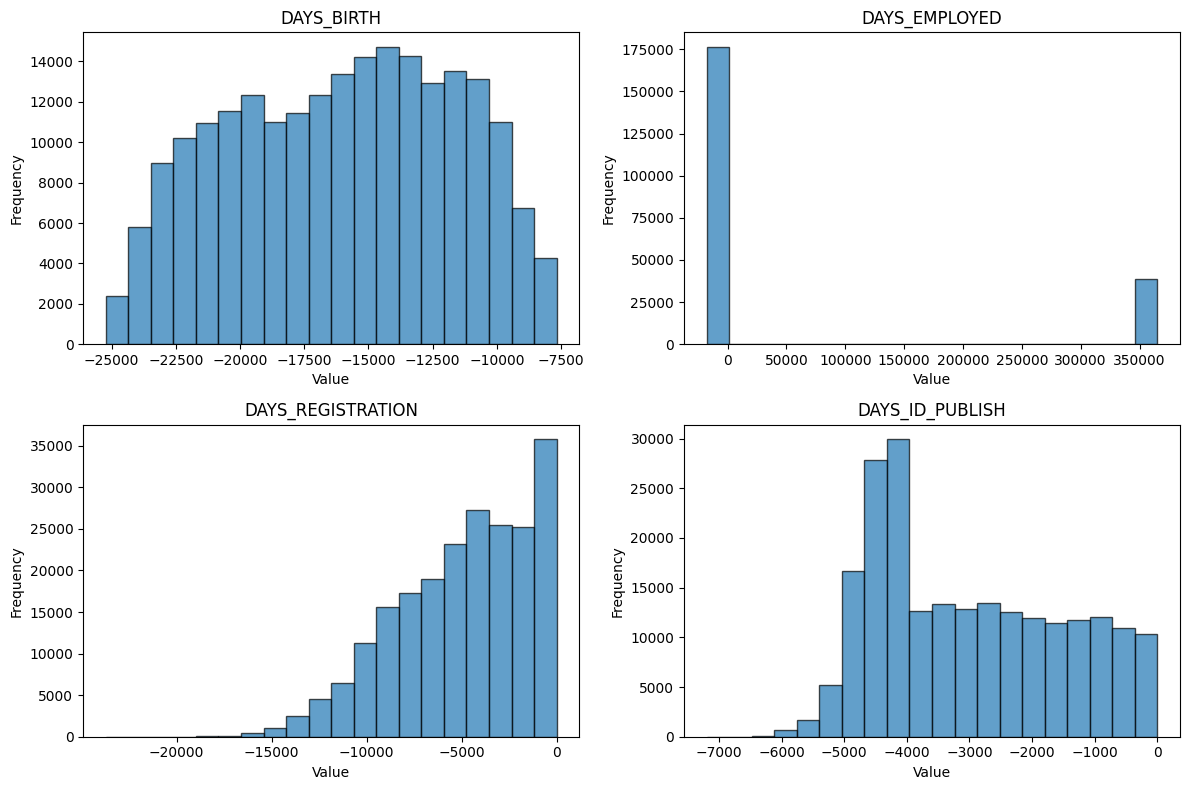

In [47]:
#negtive days and unreal data in DAYS_EMPLOYED
columns_to_plot = ['DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH']
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
fig.subplots_adjust(hspace=0.5)

for i, column in enumerate(columns_to_plot):
    row = i // 2
    col = i % 2
    ax = axes[row, col]
    ax.hist(x_train[column], bins=20, edgecolor='k', alpha=0.7)
    ax.set_title(column)
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')

if len(columns_to_plot) % 2 != 0:
    fig.delaxes(axes[row, col + 1])

plt.tight_layout()
plt.show()

In [48]:
for col in columns_to_plot:
    x_train[col] = abs(x_train[col])
    x_test[col] = abs(x_test[col])
    
x_train['DAYS_EMPLOYED'] = x_train['DAYS_EMPLOYED'].apply(lambda x: np.nan if x > 300000 else x)

x_test['DAYS_EMPLOYED'] = x_test['DAYS_EMPLOYED'].apply(lambda x: np.nan if x > 300000 else x)


### 5.6 high Otliers in AMT_INCOME_TOTAL

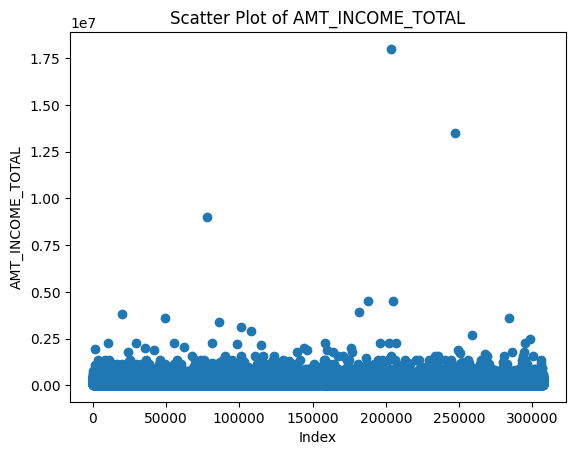

In [49]:
#there is outliers in AMT_INCOME_TOTAL
plt.scatter(x_train.index, x_train['AMT_INCOME_TOTAL'])
plt.title('Scatter Plot of AMT_INCOME_TOTAL')
plt.xlabel('Index')
plt.ylabel('AMT_INCOME_TOTAL')
plt.show()

In [50]:
#scaling use z-score
scaler = StandardScaler()

x_train['AMT_INCOME_TOTAL'] = scaler.fit_transform(x_train[['AMT_INCOME_TOTAL']])

x_test['AMT_INCOME_TOTAL'] = scaler.transform(x_test[['AMT_INCOME_TOTAL']])


### 5.7 analyze catergorical colums

In [51]:
categorical_columns = x_train.select_dtypes(include=['object']).columns.tolist()
numerical_columns = x_train.select_dtypes(include=['int64', 'float64']).columns
print(categorical_columns)

['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'EMERGENCYSTATE_MODE']


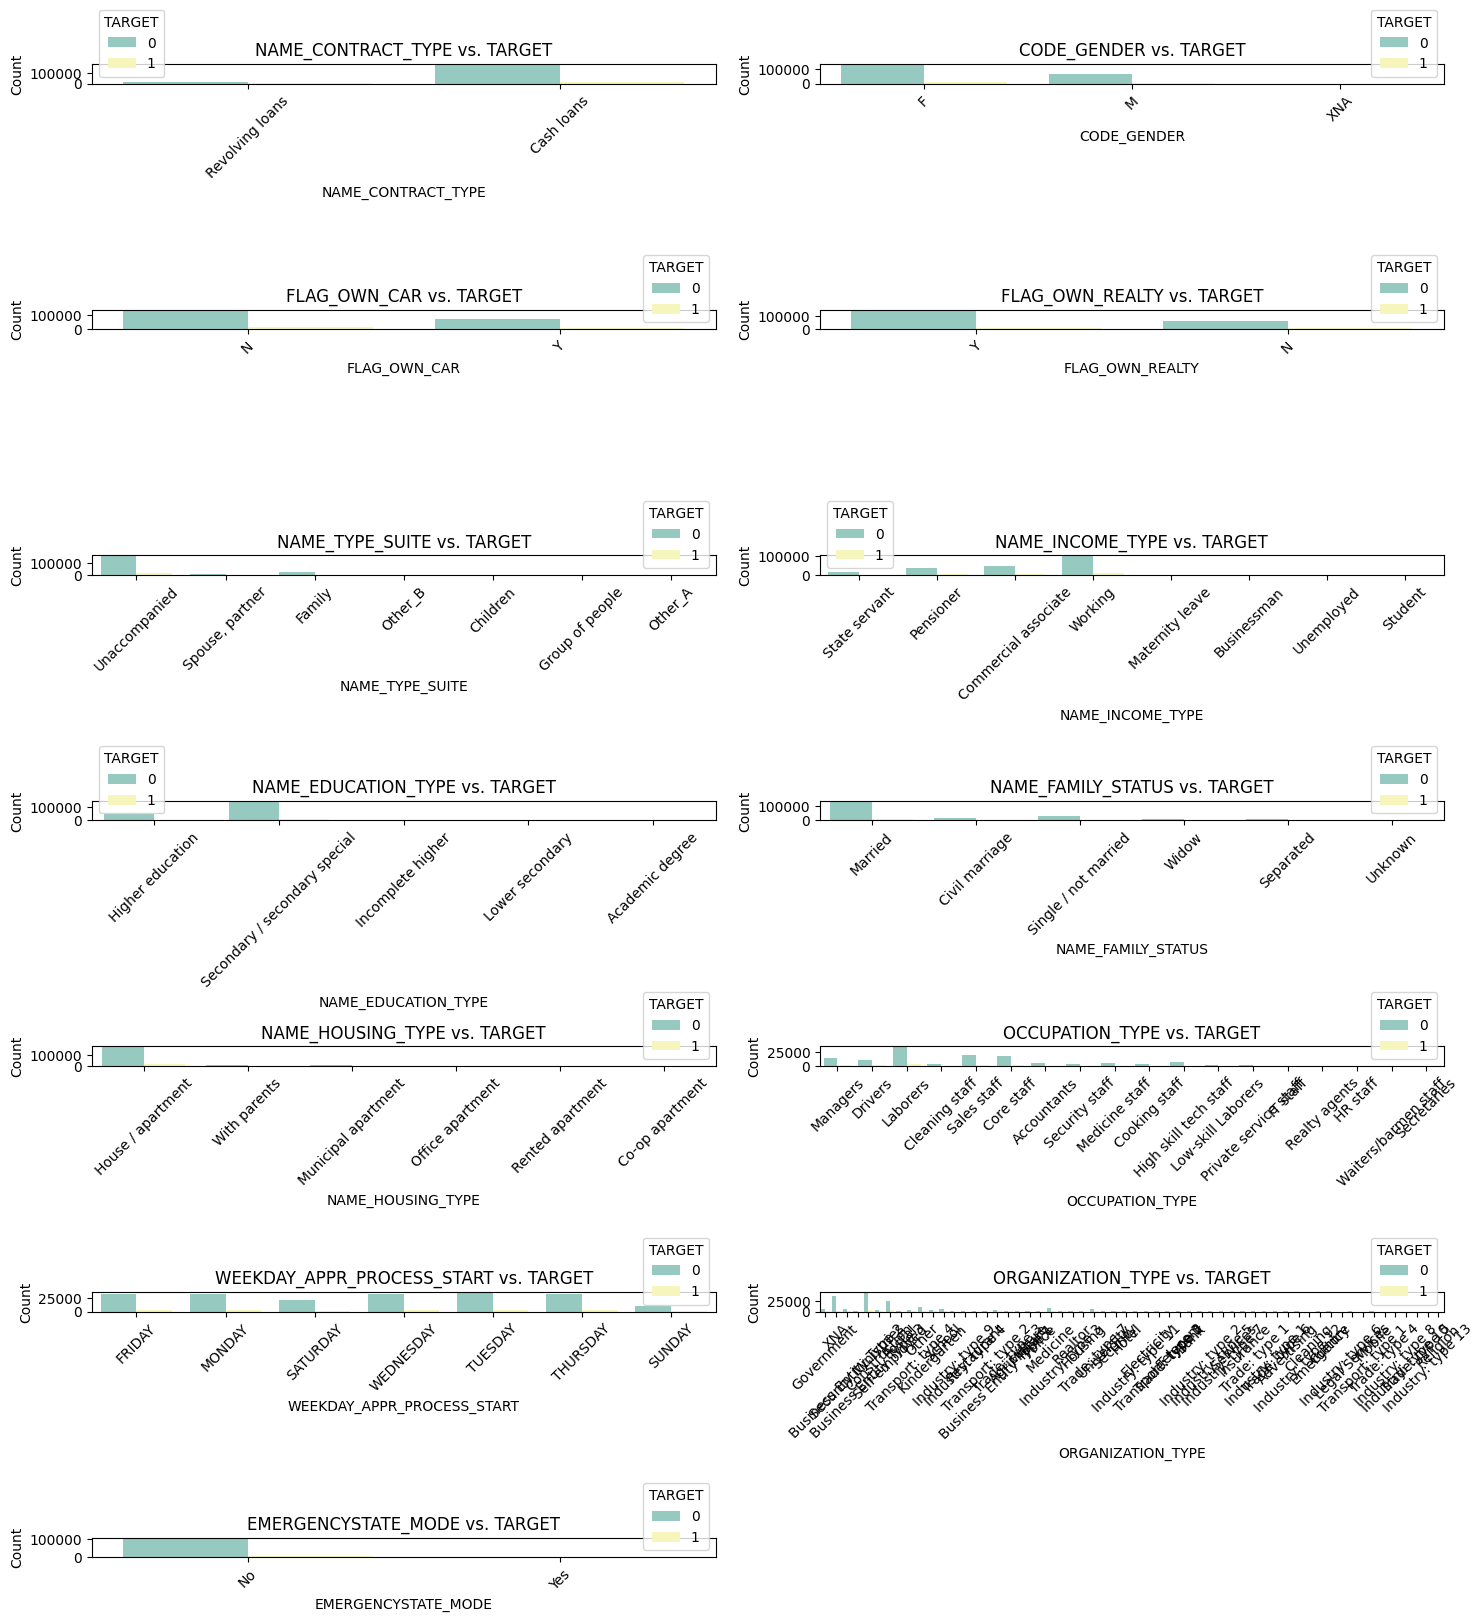

In [52]:
combined_data = pd.concat([x_train, y_train], axis=1)
categorical_columns_list = x_train.select_dtypes(include=['object']).columns.tolist()
n_cols = 2
n_rows = (len(categorical_columns_list) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 16))
fig.subplots_adjust(wspace=0.9, hspace=0.9)

for i, column in enumerate(categorical_columns_list):
    row = i // n_cols
    col = i % n_cols
    sns.countplot(data=combined_data, x=column, hue='TARGET', ax=axes[row, col], palette='Set3')
    axes[row, col].set_title(f'{column} vs. TARGET')
    axes[row, col].set_xlabel(column)
    axes[row, col].set_ylabel('Count')
    axes[row, col].tick_params(axis='x', rotation=45)
    axes[row, col].legend(title='TARGET')

for i in range(len(categorical_columns_list), n_rows * n_cols):
    fig.delaxes(axes.flatten()[i])

# Adjust the layout
plt.tight_layout()
plt.show()

In [53]:
x_train.loc[x_train['CODE_GENDER'] == 'XNA','CODE_GENDER']=np.nan
x_test.loc[x_test['CODE_GENDER'] == 'XNA','CODE_GENDER']=np.nan

In [54]:
x_train.loc[x_train['ORGANIZATION_TYPE'] == 'XNA','ORGANIZATION_TYPE']=np.nan
x_test.loc[x_test['ORGANIZATION_TYPE'] == 'XNA','ORGANIZATION_TYPE']=np.nan

# 6.1 Pipline (imputing - ecoding - scaling)

In [55]:
# Create a Pipeline
cat_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy = 'most_frequent')),
    ('encoder', OneHotEncoder(drop = 'first'))
])

num_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy = 'median')),
    ('scaler', MinMaxScaler())
])

In [56]:
num_vars_train = x_train.select_dtypes(exclude = ['object'])
cat_vars_train = x_train.select_dtypes(include = ['object'])

preprocessor_train = ColumnTransformer(
    transformers=[
        ('num', num_pipeline, num_vars_train.columns),
        ('cat', cat_pipeline, cat_vars_train.columns)
    ]
)

X_train_processed_temp = preprocessor_train.fit_transform(x_train)
# Get column names after one-hot encoding
cat_encoded_columns = preprocessor_train.named_transformers_['cat'].named_steps['encoder'].get_feature_names_out(cat_vars_train.columns.tolist())

# Combine numerical and categorical columns
all_columns = num_vars_train.columns.tolist() + cat_encoded_columns.tolist()

# Convert the preprocessed data array to a DataFrame
X_train_processed = pd.DataFrame(X_train_processed_temp, columns=all_columns)

In [57]:
num_vars_test = x_test.select_dtypes(exclude = ['object'])
cat_vars_test = x_test.select_dtypes(include = ['object'])

preprocessor_test = ColumnTransformer(
    transformers=[
        ('num', num_pipeline, num_vars_test.columns),
        ('cat', cat_pipeline, cat_vars_test.columns)
    ]
)

preprocessor_test.fit(x_train)
x_test_processed_temp=preprocessor_test.transform(x_test)
# Get column names after one-hot encoding
cat_encoded_columns_test = preprocessor_test.named_transformers_['cat'].named_steps['encoder'].get_feature_names_out(cat_vars_train.columns.tolist())

# Combine numerical and categorical columns
all_columns_test = num_vars_test.columns.tolist() + cat_encoded_columns_test.tolist()

# Convert the preprocessed data array to a DataFrame
x_test = pd.DataFrame(x_test_processed_temp, columns=all_columns_test)

# 7.1 Hadling Imblance

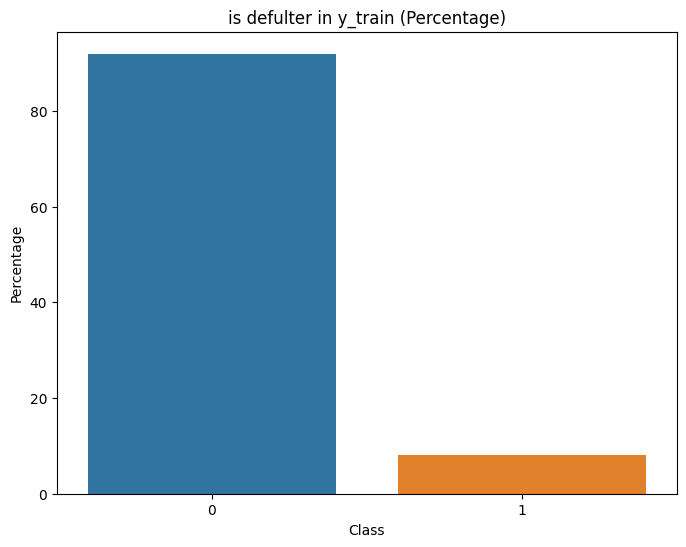

0    91.936151
1     8.063849
Name: TARGET, dtype: float64


In [58]:
class_counts = y_train.value_counts()

# Calculate the percentage of each class
class_percentages = class_counts / len(y_train) * 100

# Plot the class distribution as percentages
plt.figure(figsize=(8, 6))
sns.barplot(x=class_percentages.index, y=class_percentages.values)
plt.title('is defulter in y_train (Percentage)')
plt.xlabel('Class')
plt.ylabel('Percentage')
plt.show()

# Print class percentages
print(class_percentages)

In [59]:
somte=SMOTE(sampling_strategy='auto',random_state=40)
x_train_resample , y_train_resampl = somte.fit_resample(X_train_processed,y_train)


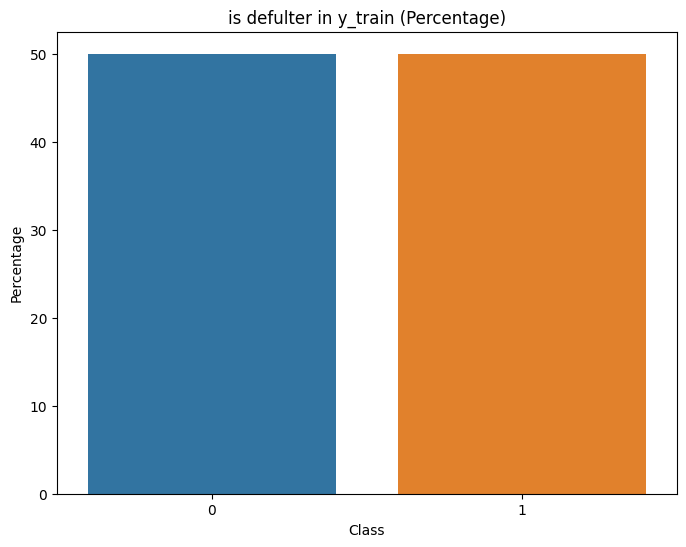

0    50.0
1    50.0
Name: TARGET, dtype: float64


In [60]:
class_counts = y_train_resampl.value_counts()

# Calculate the percentage of each class
class_percentages = class_counts / len(y_train_resampl) * 100

# Plot the class distribution as percentages
plt.figure(figsize=(8, 6))
sns.barplot(x=class_percentages.index, y=class_percentages.values)
plt.title('is defulter in y_train (Percentage)')
plt.xlabel('Class')
plt.ylabel('Percentage')
plt.show()

# Print class percentages
print(class_percentages)


# PCA

In [61]:
pca=PCA(n_components=90)
x_train=pca.fit_transform(x_train_resample)
x_test=pca.transform(x_test)
y_train=y_train_resampl

# 8.1 Build the modle

In [63]:
param_grid_logistic = {
    'C': [0.001, 0.01, 0.1, 1, 10],  # Regularization strength
    'penalty': ['l2'],         # Regularization penalty ('l1' for L1 regularization, 'l2' for L2 regularization)
    'solver': ['liblinear', 'saga']  # Solver algorithm options
}

lr_classifier = LogisticRegression()

random_search_logistic = RandomizedSearchCV( lr_classifier,
                                           param_grid_logistic,
                                           scoring='accuracy',
                                           cv=3) 
random_search_logistic.fit(x_train, y_train)

best_params_logistic = random_search_logistic.best_params_


In [64]:
best_params_logistic

{'solver': 'liblinear', 'penalty': 'l2', 'C': 10}

In [66]:


best_logistic_model = LogisticRegression(random_state=42 ,**best_params_logistic)
best_logistic_model.fit(x_train, y_train)
# Make predictions on the testing data
y_pred_logistic = best_logistic_model.predict(x_test)

# Evaluate the model's performance
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
print(f"Accuracy: {accuracy_logistic:.2f}")

# Additional evaluation metrics
print(classification_report(y_test, y_pred_logistic))

# Confusion Matrix
confusion_logistic = confusion_matrix(y_test, y_pred_logistic)
print("Confusion Matrix:")
print(confusion_logistic)

Accuracy: 0.63
              precision    recall  f1-score   support

           0       0.95      0.63      0.76     84787
           1       0.13      0.61      0.21      7467

    accuracy                           0.63     92254
   macro avg       0.54      0.62      0.48     92254
weighted avg       0.88      0.63      0.71     92254

Confusion Matrix:
[[53571 31216]
 [ 2949  4518]]
